In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("first_exo/concrete_strength_dataset.csv")

In [3]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
# pip install keras

In [5]:
# pip install tensorflow

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# split into input (X) and output (y) variables
X = df.drop(['Strength'],axis=1)
y = df["Strength"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:

# example of a standardization
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-1.24699958  1.82724983 -0.80064168 ...  1.20799779 -1.19135323
  -0.29579403]
 [-0.61372987 -0.86457843  1.17123888 ...  1.33138138  0.30486673
  -0.52327355]
 [ 0.49012633 -0.86457843 -0.80064168 ... -0.07671794  0.13141004
   5.17996308]
 ...
 [-0.87659655 -0.86457843  1.18871728 ...  1.33519737  0.35478233
   0.87410067]
 [ 1.74012169  0.48474308 -0.80064168 ... -1.55096104  0.13764949
  -0.29579403]
 [ 0.26034777 -0.86457843  0.994866   ... -0.62367612  0.15636784
  -0.29579403]]


In [10]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

In [11]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [12]:
...
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
...

Ellipsis

In [13]:
print(df[0:6:])

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
5             932.0           670.0   90     47.03  


In [14]:
from keras.callbacks import EarlyStopping

stp = EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=1,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
)

In [15]:
...
# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_split=0.30,epochs=50, batch_size=32)
...
# ,validation_split=0.33,callbacks=EarlyStopping(monitor='val_loss')

Epoch 1/50
16/16 [==============================] - 1s 21ms/step - loss: 1615.3784 - mse: 1615.3784 - val_loss: 1477.4719 - val_mse: 1477.4719
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 1601.1733 - mse: 1601.1733 - val_loss: 1464.9197 - val_mse: 1464.9197
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 1586.0482 - mse: 1586.0482 - val_loss: 1449.8633 - val_mse: 1449.8633
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 1566.0312 - mse: 1566.0312 - val_loss: 1428.9504 - val_mse: 1428.9504
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 1537.0691 - mse: 1537.0691 - val_loss: 1400.5416 - val_mse: 1400.5416
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 1498.1191 - mse: 1498.1191 - val_loss: 1358.7714 - val_mse: 1358.7714
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 1441.4351 - mse: 1441.4351 - val_loss: 1302.3169 - val_mse: 1302.3169
Epoch

Ellipsis

In [16]:
import matplotlib.pyplot as plt

print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


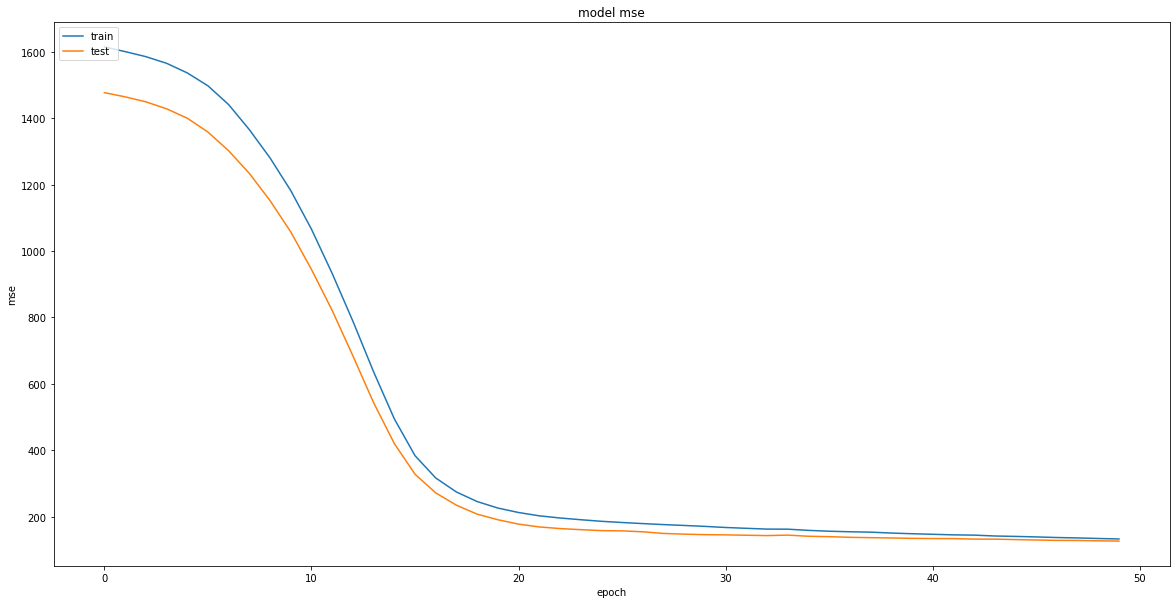

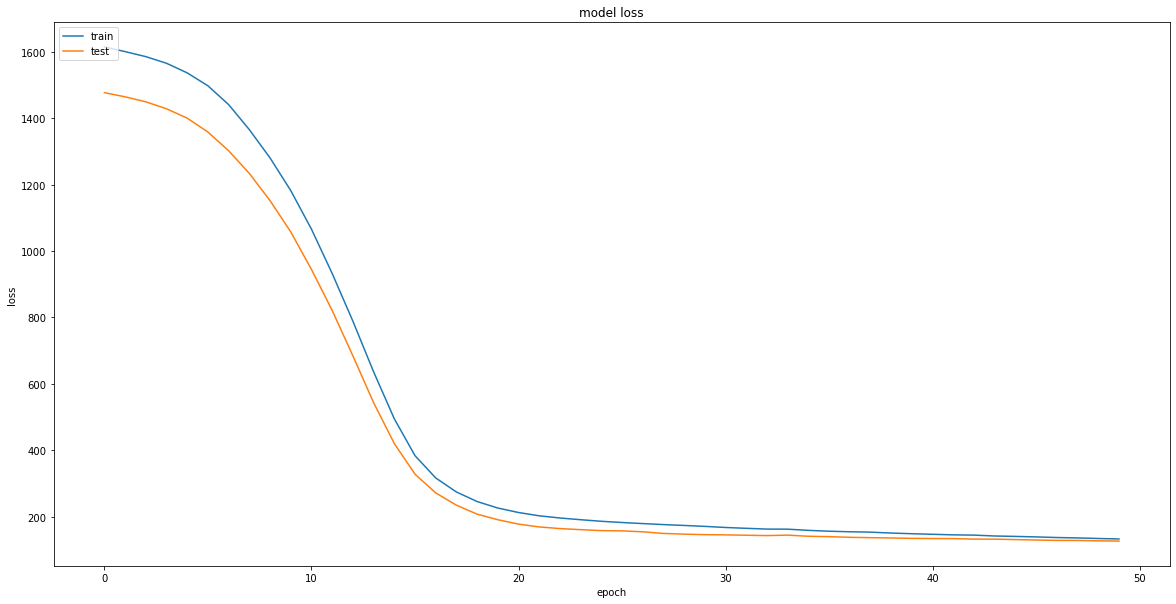

In [17]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [18]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.49791267129045935


In [40]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [41]:
def Model():
    # define the keras model
    modo = Sequential()
    modo.add(Dense(12, input_dim=8, activation='relu'))
    modo.add(Dense(8, activation='relu'))
    modo.add(Dense(6, activation='relu'))
    modo.add(Dense(1, activation='linear'))
    # compile the keras model
    # model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return modo

In [58]:
# pip install scikeras --user
clf = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=50,optimizer='adam', metrics=['mse'],
                           validation_split=0.2)

In [59]:
pipe = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf)
])


pipe.fit(X_train, y_train)

Epoch 1/50
18/18 [==============================] - 1s 23ms/step - loss: 1594.0116 - mean_squared_error: 1594.0116 - val_loss: 1599.8798 - val_mean_squared_error: 1599.8798
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 1585.7589 - mean_squared_error: 1585.7589 - val_loss: 1590.5426 - val_mean_squared_error: 1590.5426
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 1574.2947 - mean_squared_error: 1574.2947 - val_loss: 1577.0138 - val_mean_squared_error: 1577.0138
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 1556.6667 - mean_squared_error: 1556.6667 - val_loss: 1556.7278 - val_mean_squared_error: 1556.7278
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 1531.4865 - mean_squared_error: 1531.4865 - val_loss: 1527.7633 - val_mean_squared_error: 1527.7633
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 1496.8589 - mean_squared_error: 1496.8589 - val_loss: 1489.0480 - v

Pipeline(steps=[('rescale', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, epochs=50, loss='mean_squared_error', metrics=['mse'], model=<function Model at 0x00000248A7C233A0>, optimizer='adam', validation_split=0.2))])

In [60]:
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

22/22 [==============================] - 0s 2ms/step
Training set score: 0.4962919914628887
11/11 [==============================] - 0s 2ms/step
Test set score: 0.4842647910409029


In [64]:
hist = clf.history_.keys()
print(hist)

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error', 'mse'])


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


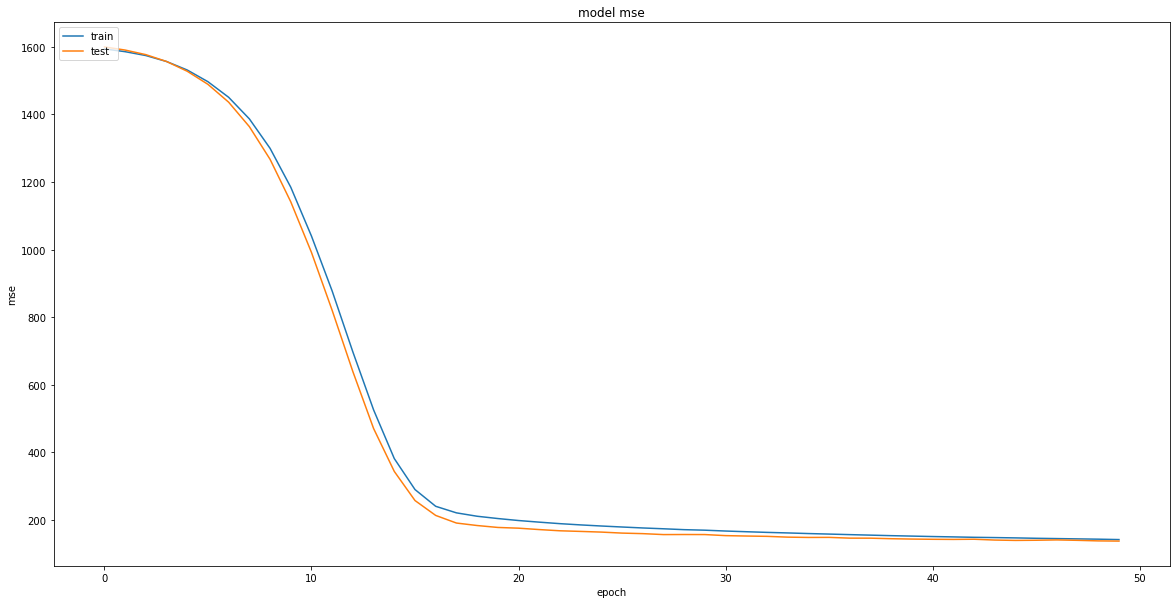

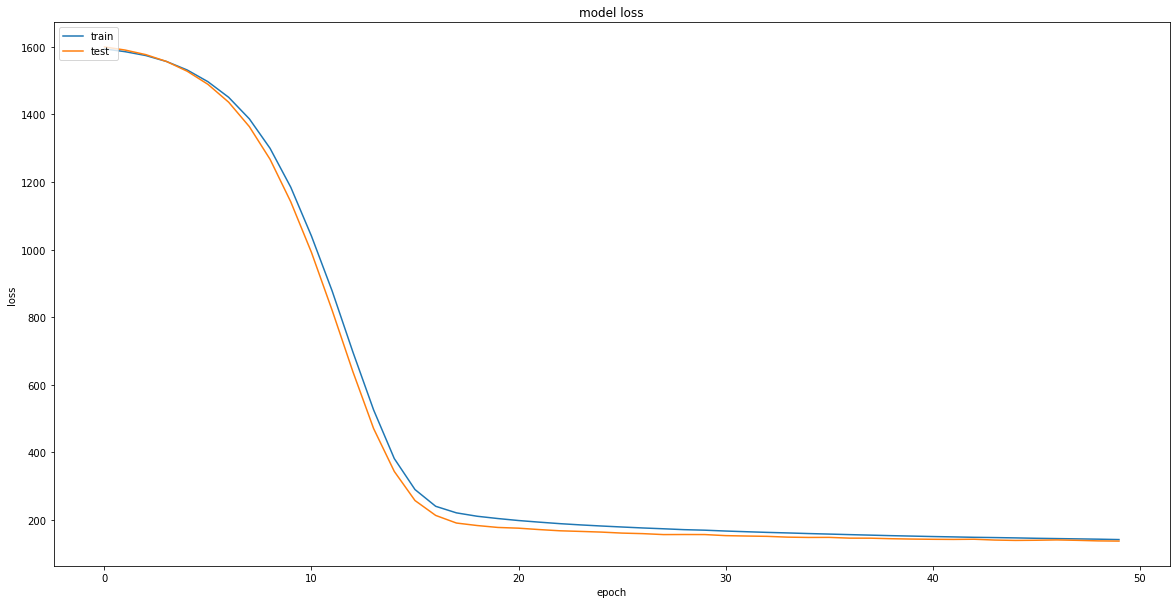

In [66]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(clf.history_['mean_squared_error'])
plt.plot(clf.history_['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(clf.history_['loss'])
plt.plot(clf.history_['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print()

In [29]:
print(f"Trained {len(pipe.history_['loss'])} epochs")
print(f"Final accuracy: {pipe.history_['val_binary_accuracy'][-1]}")  # get last value of last fit/partial_fit call

AttributeError: 'Pipeline' object has no attribute 'history_'